<a href="https://colab.research.google.com/github/sathizz7/Car-price-data/blob/main/Car_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('cars_class.csv')

In [ ]:
data

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,715,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183,0
715,716,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194,2
716,717,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204,3
717,718,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197,2


In [ ]:
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [ ]:
data.Class.unique()

array([0, 3, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


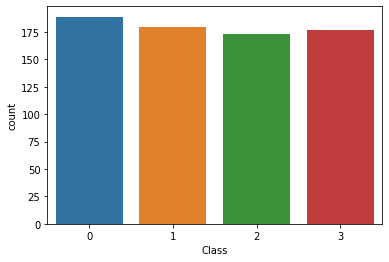

In [ ]:
import seaborn as sns
sns.countplot('Class', data =data)

In [ ]:
data['Max.L.Ra'].unique()

array([ 7,  6,  9, 10, 11,  8,  5, 12,  4, 49,  3, 13, 22, 46,  2, 48, 52,
       25, 55, 43, 19])

In [ ]:
data.duplicated().sum()

0

In [ ]:
X = data.iloc[:, 0:-1]
y = data['Class']

In [ ]:
y.head()

0    0
1    3
2    3
3    1
4    2
Name: Class, dtype: int64

In [ ]:
X.shape

(719, 19)

In [ ]:
y.shape

(719,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, stratify = y)

In [ ]:
Xtrain.shape

(575, 19)

In [ ]:
ytrain.shape

(575,)

In [ ]:
ytrain.value_counts()

0    151
1    144
3    142
2    138
Name: Class, dtype: int64

In [ ]:
####
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
Xtrain = ss.fit_transform(Xtrain)

In [ ]:
Xtest = ss.transform(Xtest)

Modeling

In [ ]:
#Logistic Regresiion
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print(LR.score(Xtrain, ytrain))
print(LR.score(Xtest, ytest))

0.8243478260869566
0.7986111111111112


In [ ]:
ypred = LR.predict(Xtest)

In [ ]:
ypred

array([3, 3, 2, 3, 0, 0, 0, 1, 3, 0, 3, 1, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 3, 1, 1, 3, 0, 2, 0, 3, 2, 0, 1, 2, 3, 2, 0, 0, 0, 3, 0, 3, 1,
       2, 3, 3, 1, 2, 3, 1, 2, 2, 0, 3, 2, 0, 3, 2, 0, 1, 2, 0, 0, 2, 0,
       3, 3, 2, 0, 0, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 0, 3, 1, 3, 2, 3, 2,
       2, 1, 2, 1, 0, 3, 0, 2, 2, 0, 0, 3, 2, 3, 2, 1, 1, 2, 1, 2, 3, 2,
       0, 2, 3, 1, 1, 2, 2, 0, 1, 3, 1, 2, 0, 1, 2, 3, 2, 1, 2, 3, 2, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 3, 2])

In [ ]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(ytest, ypred, average = 'macro'))

0.7944309491677913


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


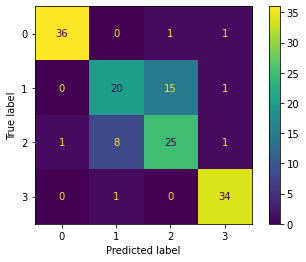

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, Xtest, ytest)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
print(knn.score(Xtrain,ytrain))
print(knn.score(Xtest, ytest))

0.8243478260869566
0.7152777777777778


In [ ]:
#f1 score
ypred = knn.predict(Xtest)
print(f1_score(ytest,ypred, average = 'macro'))

0.7032077057634203


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


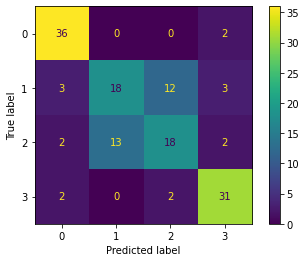

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,Xtest, ytest)

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
print(dtc.score(Xtrain, ytrain))
print(dtc.score(Xtest, ytest))

1.0
0.7152777777777778


In [ ]:
#f1Score
ypred = dtc.predict(Xtest)
print(f1_score(ytest,ypred, average = 'macro'))

0.7226672554116719


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


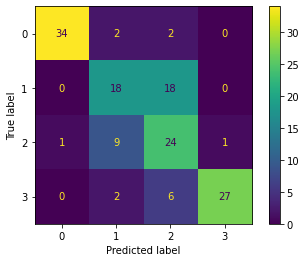

In [ ]:
plot_confusion_matrix(dtc,Xtest,ytest)

SVM
Justright

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(Xtrain,ytrain)

SVC()

In [ ]:
print(svc.score(Xtrain,ytrain))
print(svc.score(Xtest,ytest))

0.8347826086956521
0.7430555555555556


In [ ]:
ypred = svc.predict(Xtest)

In [ ]:
#f1Score
print(f1_score(ytest, ypred, average = 'macro'))

0.7331417211402386


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


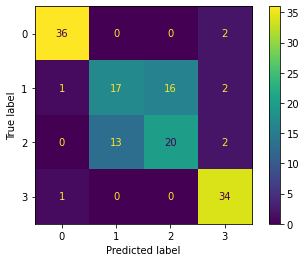

In [ ]:
plot_confusion_matrix(svc,Xtest, ytest)

Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
Gb = GradientBoostingClassifier()
Gb.fit(Xtrain,ytrain)

GradientBoostingClassifier()

In [ ]:
print(Gb.score(Xtrain, ytrain))
print(Gb.score(Xtest, ytest))

0.9982608695652174
0.7569444444444444


In [ ]:
ypred = Gb.predict(Xtest)

In [ ]:
#f1score

print(f1_score(ytest, ypred, average= 'macro'))

0.7510510374072392


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


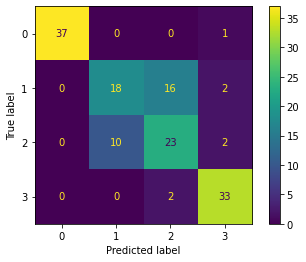

In [ ]:
plot_confusion_matrix(Gb,Xtest, ytest)

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [ ]:
print(rfc.score(Xtrain, ytrain))
print(rfc.score(Xtest, ytest))

1.0
0.7916666666666666


In [ ]:
ypred = rfc.predict(Xtest)
#f1_score
print(f1_score(ytest, ypred, average = 'macro'))

0.7858743169398907


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


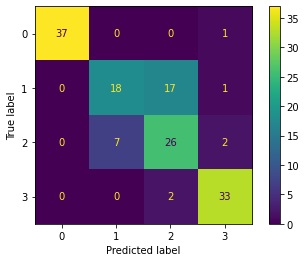

In [ ]:
#plotting

plot_confusion_matrix(rfc, Xtest, ytest)

In [ ]:
#Naivebayes

from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

GaussianNB()

In [ ]:
print(nb.score(Xtrain, ytrain))
print(nb.score(Xtest, ytest))

0.4678260869565217
0.4375


In [ ]:
ypred = nb.predict(Xtest)

print(f1_score(ytest, ypred, average = 'macro'))

0.4014744030330577


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


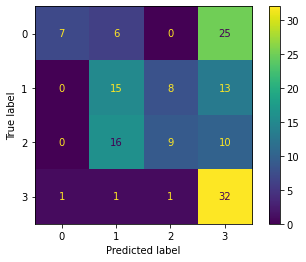

In [ ]:
plot_confusion_matrix(nb, Xtest, ytest)

Final Model

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}

#param_grid = {'multi_class': ['multinomial']}

In [ ]:
gscv = GridSearchCV(LogisticRegression(), param_grid = param_grid)

In [ ]:
gscv.fit(Xtrain , ytrain)

In [ ]:
gscv.score(Xtrain, ytrain)

0.8434782608695652

In [ ]:
gscv.score(Xtest, ytest)

0.8125

In [ ]:
ypred = gscv.predict(Xtest)

print(f1_score(ytest, ypred, average = 'macro'))

0.8124337057477453


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


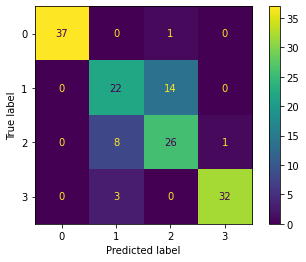

In [ ]:
plot_confusion_matrix(gscv,Xtest, ytest)

In [ ]:
import seaborn as sns

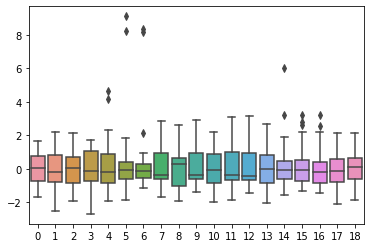

In [ ]:
sns.boxplot(data = Xtest)

-------